# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**APROXIMACION:**
Los datos que creo que incluye el data sets son: precio, ubicacion, superficie y alguna descripcion de los ambientes que contiene cada propiedad.
Considero que para realizar una buena prediccion de precio, los datos que mas me ayudarian serian: la superficie de las propiedades y la zona en la cual esta ubicada. La superficie esta indicando indirectamente las comodidades de una propiedad y la ubicacion es clave para formar el precio.  



---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
import pandas as pd

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cargo y visualizo las primeras 5 instancias del dataset:
prop = pd.read_csv("/content/drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv", engine='python')
prop.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
#Veo el tamaño del dataset (numero de filas y columnas)
print("Tamaño del dataset - filas, columnas:", prop.shape)

Tamaño del dataset - filas, columnas: (146660, 19)


In [ ]:
#Nombres de cada columna del dataset
print("Nombre de las columnas del dataset:", prop.columns)

Nombre de las columnas del dataset: Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
#Veo los valores faltantes en cada atributo:
print("La cantidad de valores faltantes por columna son:\n", prop.isna().sum())

La cantidad de valores faltantes por columna son:
 start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [ ]:
#Veo si los precios estan todos en la misma moneda
prop["currency"].describe


<bound method NDFrame.describe of 0         USD
1         USD
2         USD
3         USD
4         USD
         ... 
146655    USD
146656    USD
146657    USD
146658    USD
146659    USD
Name: currency, Length: 146660, dtype: object>

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#Veo los tipos de propiedad que aparecen en el dataset:
print("Los tipos de propiedades publicados son:\n", prop["property_type"].value_counts())


Los tipos de propiedades publicados son:
 Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


Text(0.5, 1.0, 'Cantidad de propiedades de cada tipo')

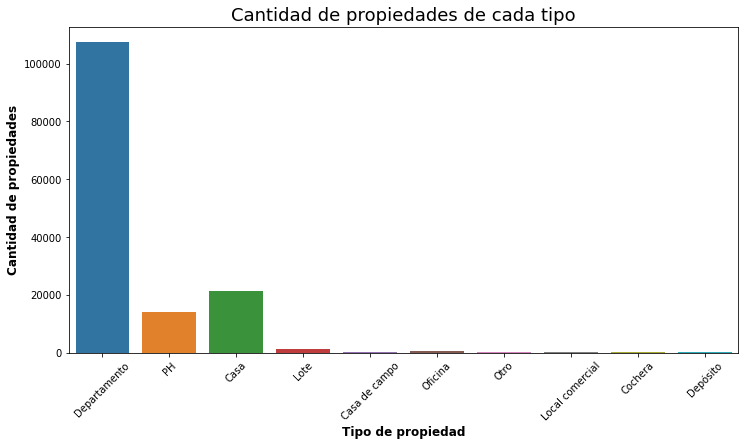

In [ ]:
plt.subplots(figsize = (12,6))
sns.countplot(data = prop, x = "property_type")
plt.xlabel("Tipo de propiedad", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Cantidad de propiedades de cada tipo", fontsize=18, color="black")

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#Cambio el nombre de algunas columnas:
prop.rename(columns={"l1" : 'country', "l2" : 'city', "l3": "barrio"}, inplace=True)
prop.head()

,start_date,end_date,created_on,lat,lon,country,city,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]), <a list of 89 Text major ticklabel objects>)

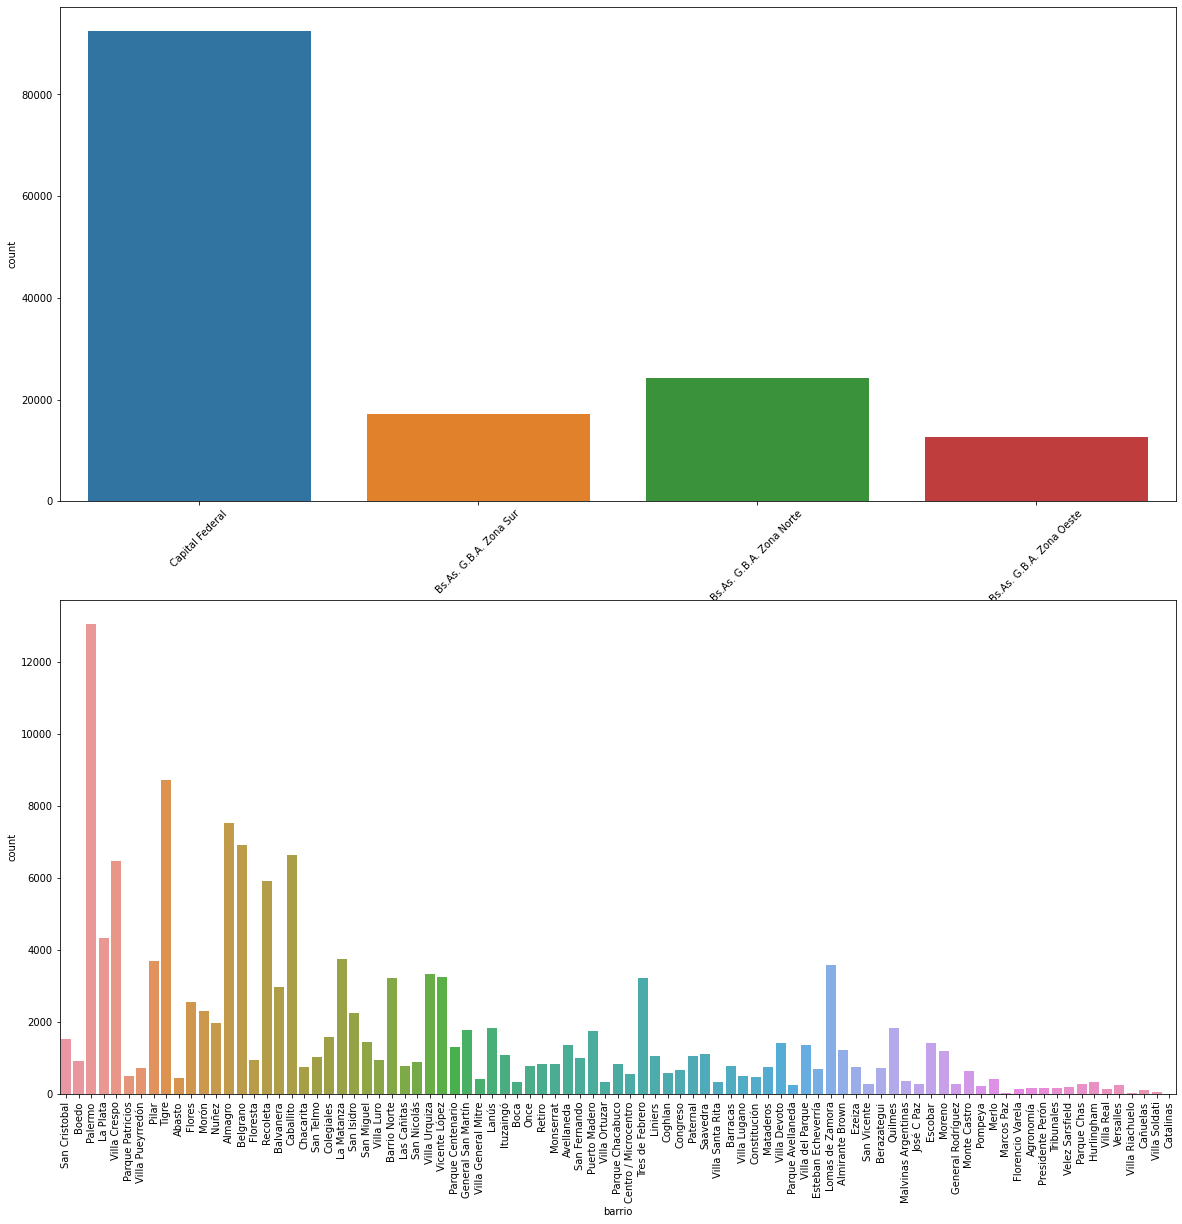

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.countplot(data = prop, x = "city")
plt.xticks(rotation = 45)
plt.subplot(2,1,2)
sns.countplot(data = prop, x = "barrio")
plt.xticks(rotation = 90)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
#Selecciono las 3 clases mas abundantes y genero un nuevo dataset:
prop_abund=prop[prop.property_type.isin(["Departamento", "PH","Casa"])]
prop_abund.head()

,start_date,end_date,created_on,lat,lon,country,city,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
#Filtro solo lo que corresponda a Capital Federal:
prop_abund1=prop_abund[prop_abund.city.isin(["Capital Federal"])]
prop_abund1.head()

,start_date,end_date,created_on,lat,lon,country,city,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [ ]:
print("El tamaño del nuevo dataset es: ", prop_abund1.shape)

El tamaño del nuevo dataset es:  (91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Estadisticos analisis preliminar de los datos. 
prop_abund1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**Comentario:** luego de hacer una aproximacion a los estadisticos de los atributos seleccionados se ve que:


*   Rooms, bedrooms y bathrooms: tienen un número maximo excesivo.
*   Superficie total y cubierta: tienen valores minimos y maximos raros, que no serian acordes a una propiedad.
*   Precio: presenta valores maximos excesivamente elevados.





In [ ]:
#Vemos datos faltantes y los eliminamos:
print("Cantidad de valores faltantes por columna:\n", prop_abund1.isna().sum())

Cantidad de valores faltantes por columna:
 start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
country               0
city                  0
barrio                0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64


In [ ]:
prop_abund1=prop_abund1.dropna(subset = ["bathrooms", "surface_total", "surface_covered"])


**Comienzo a filtar por valores razonales de superficie, de baños, de habitaciones y de ambientes:**

In [ ]:
Filtro_sc = prop_abund1[["surface_covered"]].quantile(0.90)
print(Filtro_sc)

surface_covered    151.0
Name: 0.9, dtype: float64


In [ ]:
Filtro_st = prop_abund1[["surface_total"]].quantile(0.90)
print(Filtro_st)

surface_total    180.0
Name: 0.9, dtype: float64


In [ ]:
#Filtrar superficie total razonable: entre 20-180 m2, superficie cubierta entre 20 m2-151 m2 y con superficie cubierta menor a superficie total (ahi arme nuevo dataset):
prop1=prop_abund1[(prop.surface_total < 180) & (prop.surface_total > 20)& (prop.surface_covered > 20)& (prop.surface_covered < 151)&(prop.surface_covered < prop.surface_total)]
prop1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,start_date,end_date,created_on,lat,lon,country,city,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,USD,Villa Pueyrredón PH 2 ambientes con 2 terrazas...,PH CON TERRAZAS PROPIAS EN DUPLEX MUY LUMINOSO...,PH,Venta


In [ ]:
#Filtrar por numero de baños, habitaciones y ambientes. Considero que deberian contener menos de 6 baños, menos de 6 habitaciones y menos de 15 ambientes:
prop2=prop1[(prop1.bathrooms < 6) & (prop1.bedrooms < 6)&(prop1.rooms< 15)]
prop2.head()

,start_date,end_date,created_on,lat,lon,country,city,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,USD,Villa Pueyrredón PH 2 ambientes con 2 terrazas...,PH CON TERRAZAS PROPIAS EN DUPLEX MUY LUMINOSO...,PH,Venta


In [ ]:
#Vuelvo a mirar algunos estadísticos
prop2[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,49175.000000,49175.000000,49175.000000,49175.000000,49175.000000,4.917500e+04
mean,2.777245,1.827270,1.434347,77.649497,65.720183,2.112135e+05
std,0.977707,0.824529,0.657710,33.501442,27.517460,1.268355e+05
min,1.000000,0.000000,1.000000,22.000000,21.000000,1.400000e+04
25%,2.000000,1.000000,1.000000,51.000000,44.000000,1.300000e+05
50%,3.000000,2.000000,1.000000,70.000000,60.000000,1.780000e+05
75%,3.000000,2.000000,2.000000,96.000000,80.000000,2.500000e+05
max,11.000000,5.000000,5.000000,179.000000,150.000000,3.249900e+06


**Comentario:** Ahora mejoran los valores pero falta trabajar precio y luego ver la distribucion de todas las variables para detectar datos atípicos:

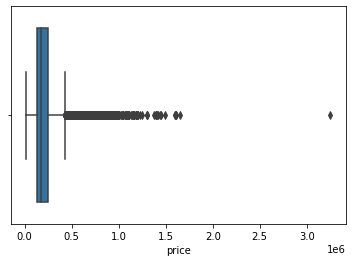

In [ ]:
#Analizar precios y asi tomar un criterio para eliminar outliers:
sns.boxplot(x=prop2["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proporción de propiedades')

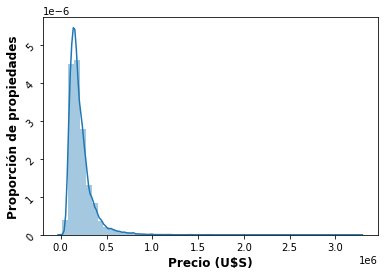

In [ ]:
sns.distplot(prop2.price)
plt.yticks(rotation = 45)
plt.xlabel("Precio (U$S)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

In [ ]:
Filtro = prop2[["price"]].quantile(0.90)
print(Filtro)

price    355000.0
Name: 0.9, dtype: float64


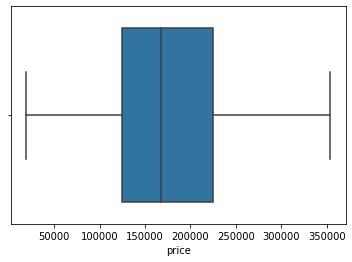

In [ ]:
#Filtrar por precio. Use como maximo 3550000, segun el analisis anterior y, como minimo (a mi criterio) 15000:
prop2=prop2[(prop2.price < 355000) &(prop2.price > 15000)]
sns.boxplot(x=prop2["price"])



In [ ]:
prop2.shape

(44201, 19)

In [ ]:
#Vuelvo a mirar algunos estadísticos
prop2[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000
mean,2.679623,1.745390,1.326712,72.120676,60.778580,179024.800005
std,0.947874,0.795585,0.549392,29.354134,23.120089,68167.033937
min,1.000000,0.000000,1.000000,22.000000,21.000000,18900.000000
25%,2.000000,1.000000,1.000000,50.000000,43.000000,125100.000000
50%,3.000000,2.000000,1.000000,66.000000,56.000000,167800.000000
75%,3.000000,2.000000,2.000000,87.000000,74.000000,225000.000000
max,11.000000,5.000000,5.000000,179.000000,150.000000,354015.000000


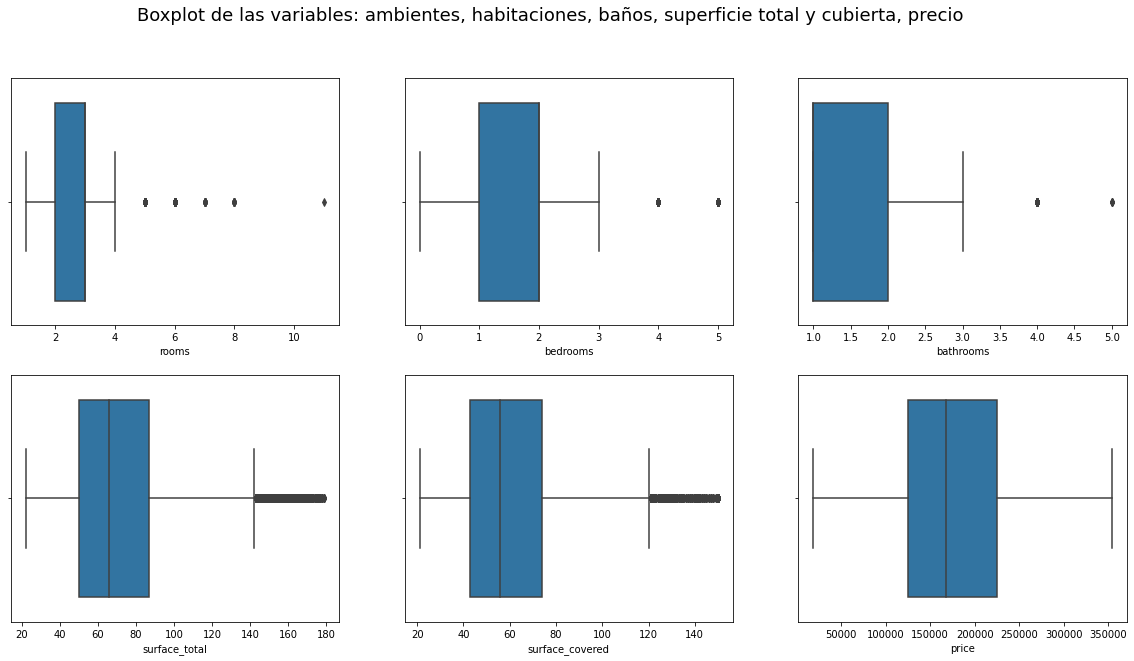

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.suptitle("Boxplot de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "black")
sns.boxplot(x=prop2["rooms"])
plt.subplot(2,3,2)
sns.boxplot(x=prop2["bedrooms"])
plt.subplot(2,3,3)
sns.boxplot(x=prop2["bathrooms"])
plt.subplot(2,3,4)
sns.boxplot(x=prop2["surface_total"])
plt.subplot(2,3,5)
sns.boxplot(x=prop2["surface_covered"])
plt.subplot(2,3,6)
sns.boxplot(x=prop2["price"])




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0, 0.5, 'Proporción de propiedades')

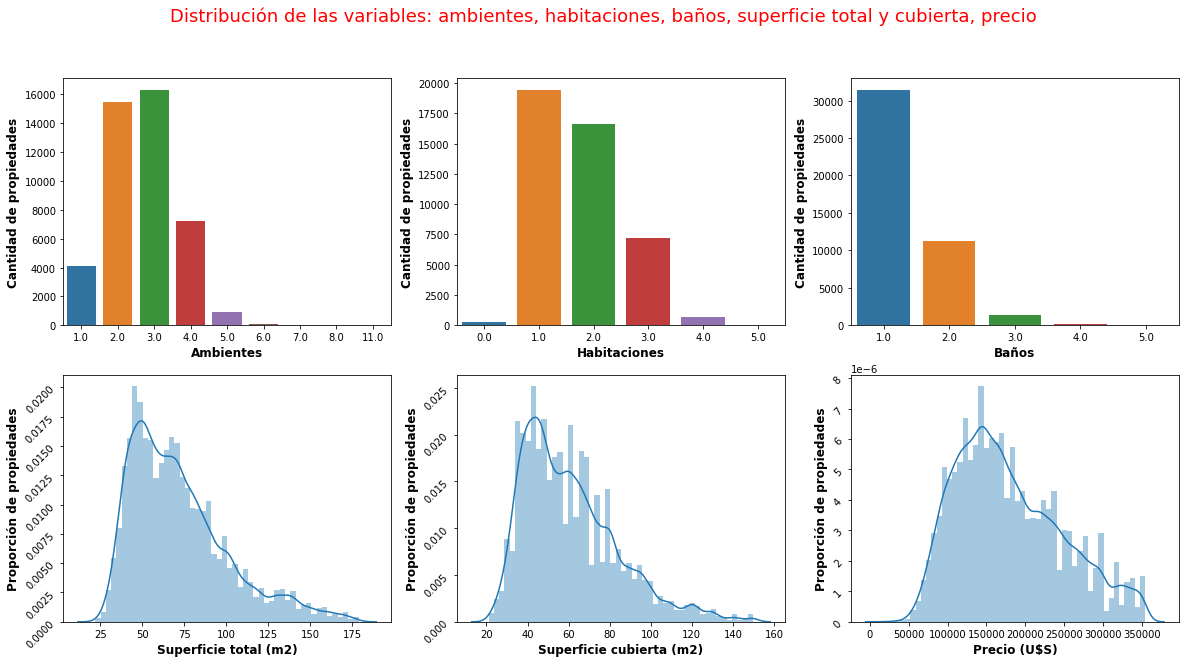

In [ ]:
#Realizamos unos gráficos de barra para las variables discretas e histogramas para las continuas, para tener una mejor visualización de las distribuciones
plt.figure(figsize = (20,10))
plt.suptitle("Distribución de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "r")

plt.subplot(2,3,1)
sns.countplot(prop2.rooms)
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.countplot(prop2.bedrooms)
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.countplot(prop2.bathrooms)
plt.xlabel("Baños", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.distplot(prop2.surface_total)
plt.yticks(rotation = 45)
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.distplot(prop2.surface_covered)
plt.yticks(rotation = 45)
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.distplot(prop2.price)
plt.yticks(rotation = 45)
plt.xlabel("Precio (U$S)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

**Comentario:** luego de los filtros realizados anteriormente considero que el dataset esta en condiciones de seguir con el analisis exploratorio.

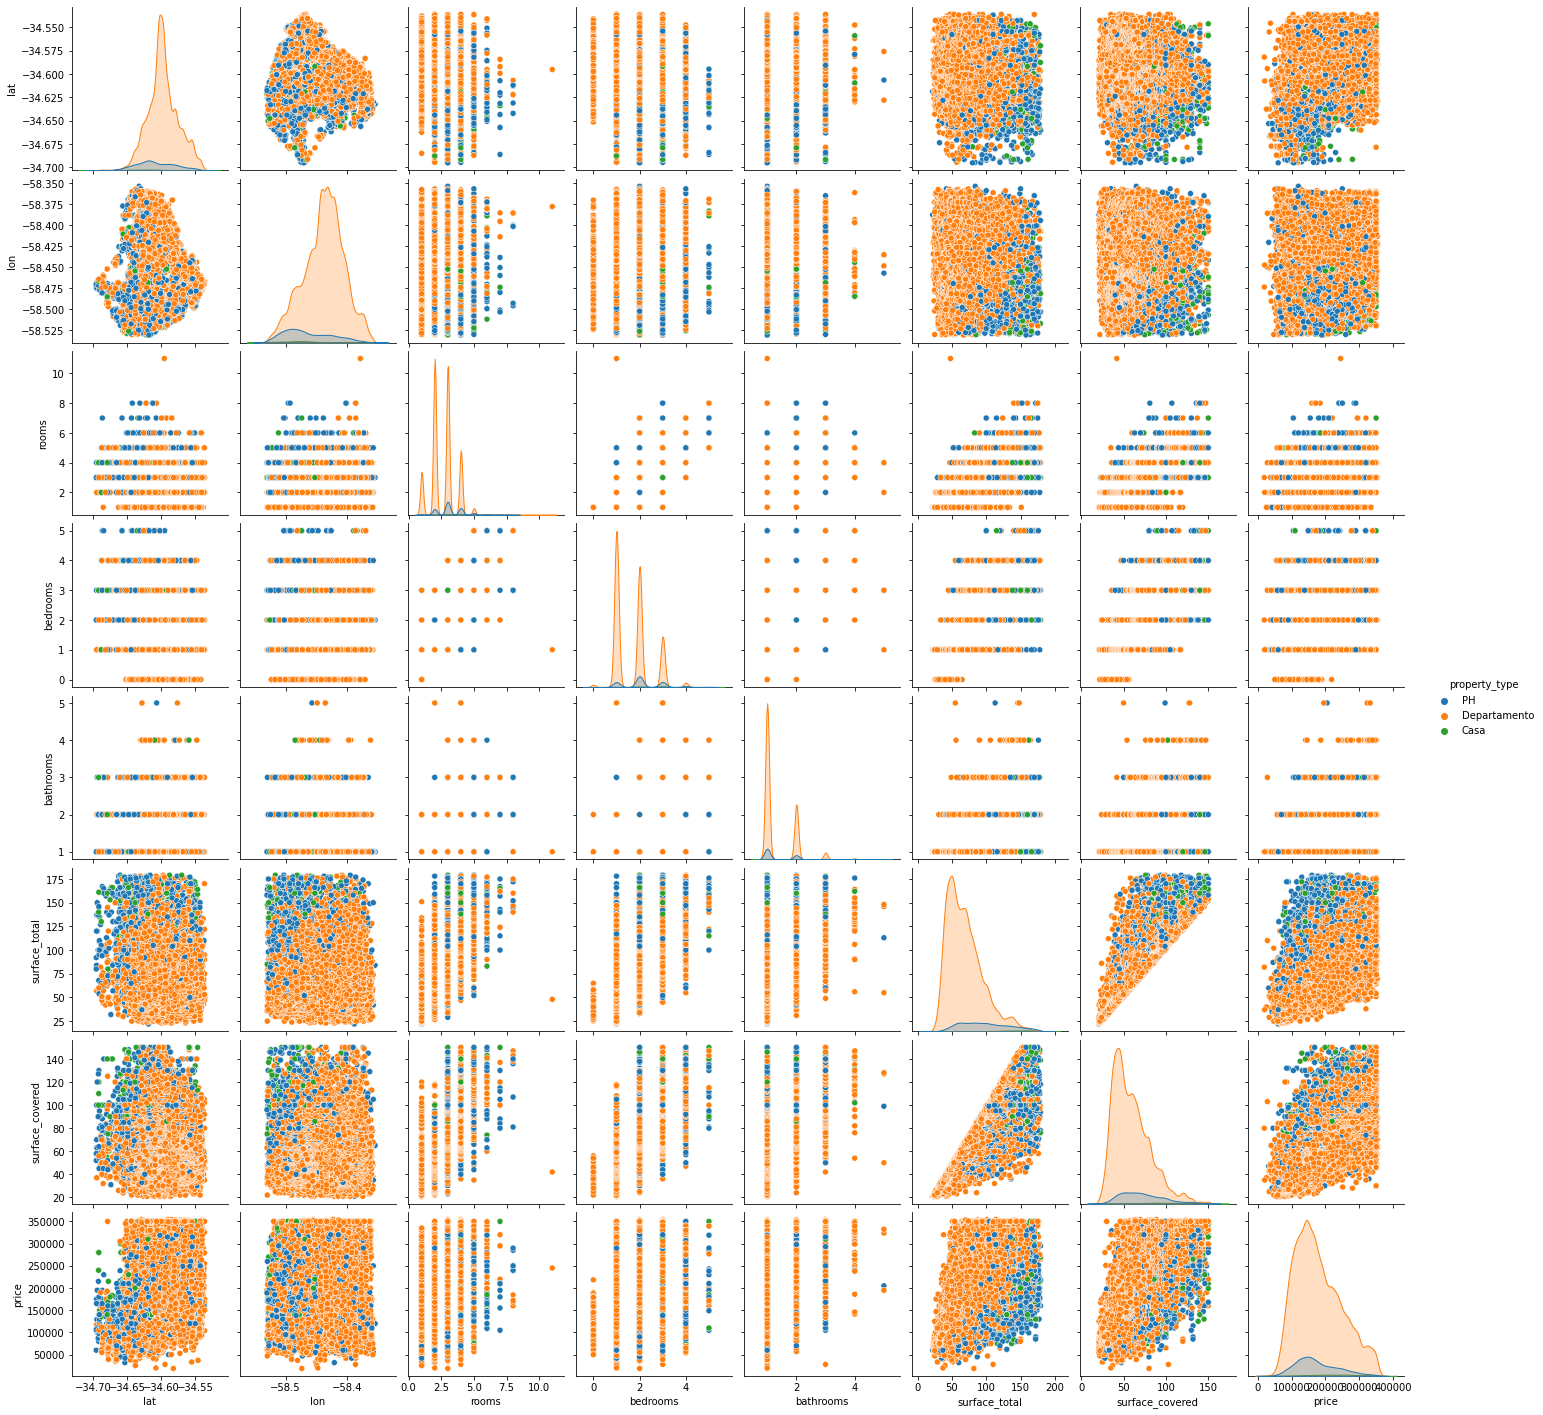

In [ ]:
sns.pairplot(prop2, hue = "property_type")

**Comentario pairplot:** Viendo las diagonales, vemos las distribuciones de cada variable. 
Pareceria que los departamentos en general se aglomeran mejor mientras que es dificil separar las casas de los PH. Esto podria deberse al mayor numero de departamentes en el dataset.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Text(0.5, 1.0, 'Coeficientes de correlación')

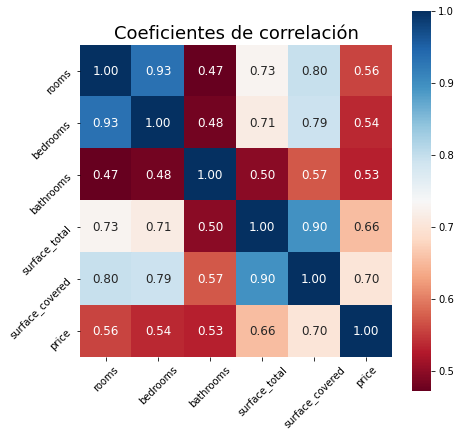

In [ ]:
corr = prop2.drop(['lat', 'lon'], axis = 1).corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap="RdBu")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Coeficientes de correlación", fontsize = 18, color = "black")

**Comentario correlaciones:** Se observan correlaciones elevadas. Para predecir precio, pareceria que la correlación mas alta aparece con la superficie cubierta (0.70) y luego la superfifie total que tambien mostro un valor de correlacion alto (0.66). Por último, el numero de baños, de habitaciones y  de ambientes (estas últimas muy asociadas entre si) mostraron correlaciones mas bajas con el precio: 0.53, 0.54 y 0.56, respectivamente.

**Analisis de las correlaciones de cada tipo de propiedad mas abundante:** Lo que hago es evaluar como se correlacionan las variables en casas, departamentos y PH por separado.

Text(0.5, 1.0, 'PH')

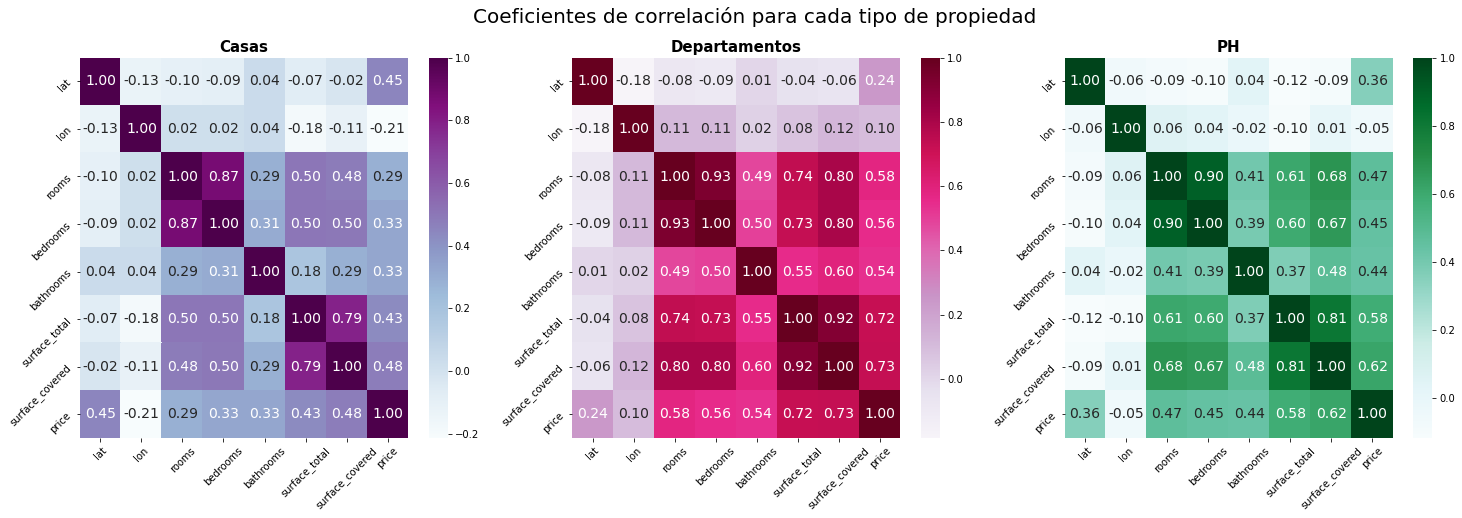

In [ ]:
corr_casa = prop2[prop2.property_type == "Casa"].corr()
corr_depto = prop2[prop2.property_type == "Departamento"].corr()
corr_ph = prop2[prop2.property_type == "PH"].corr()

plt.figure(figsize=(25,7))
plt.suptitle("Coeficientes de correlación para cada tipo de propiedad", fontsize = 20, color = "black")

plt.subplot(1,3,1)
sns.heatmap(corr_casa, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap="BuPu")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Casas", fontweight = "black", fontsize = 15)

plt.subplot(1,3,2)
sns.heatmap(corr_depto, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap="PuRd")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Departamentos", fontweight = "black", fontsize = 15)

plt.subplot(1,3,3)
sns.heatmap(corr_ph, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'BuGn')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("PH", fontweight = "black", fontsize = 15)

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**Comentarios:** **CASAS**: analizando solo las correlaciones con precio en las casas, se observa que estas bajan respecto a las correlaciones que vimos en el punto anterior. La correlacion mas alta aparece con la superfici cubierta con valores de 0.53.
**DEPARTAMENTOS:** contrario a lo observado en las casas, en los departamentos, el precio muestra correlacion elevada (> 0.59) con todas las variables excepto con latitud y longitud. La mayor correlacion se observa con superficie cubierta (0.77), luego con superficie total (0.74) y, con los baños (0.63). Se parece bastante al analisis del punto anterior y esto se debe a que los departamentos son el tipo de propiedad mas abundante.
**PH:** en este caso ocurre algo similar a los departamentos. Las correlaciones mas altas se dan con superfici cubierta (0.71) y superficie total (0.69). El resto de las variables muestran correlaciones mas bajas, del orden de 0.50.

**Desafio:** centrandome solo en dos tipos de propiedad: Casa y Departamentos. Encontrar cual es el barrio de Capital Federal mas caro. Hacerlo por separado para poder comparar.

In [ ]:
import seaborn as sns

In [ ]:
#Filtro los dos tipos de propiedades que quiero analizar:
prop_desafio=prop2[prop2.property_type.isin(["Departamento"])]
prop_desafio2=prop2[prop2.property_type.isin(["Casa"])]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Precio medio de las casas en Capital Federal')

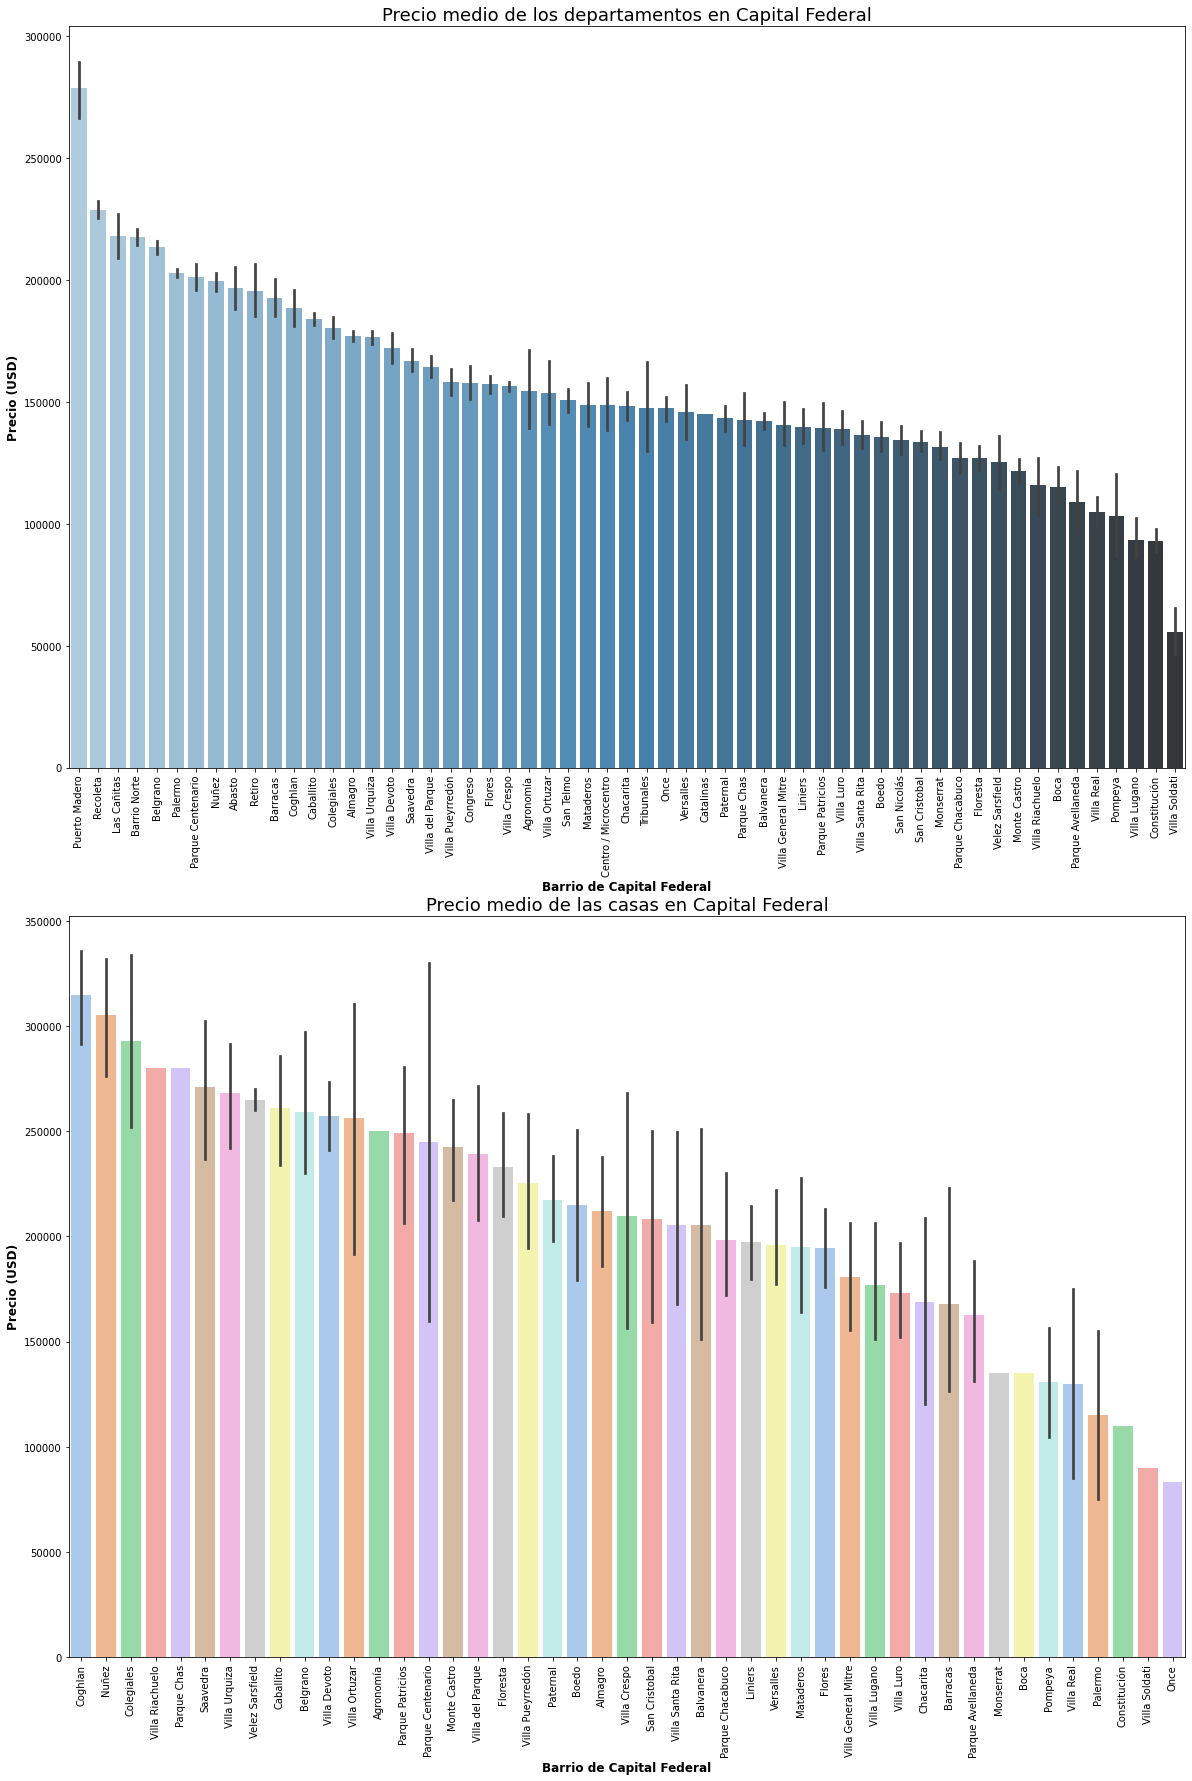

In [ ]:
#Grafico los precios de los departamentos y de las casas en funcion del barrio en el cual esta ubicado:
orden = prop_desafio.groupby(["barrio"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

plt.figure(figsize = (20,30))
plt.subplot(2,1,1)
sns.barplot(prop_desafio.barrio, prop_desafio.price, order = orden["barrio"], palette="Blues_d")
plt.xticks(rotation = 90)
plt.xlabel("Barrio de Capital Federal", fontweight = "black", fontsize = 12)
plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)
plt.title("Precio medio de los departamentos en Capital Federal", fontsize=18, color="black")

orden1 = prop_desafio2.groupby(["barrio"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

plt.subplot(2,1,2)

sns.barplot(prop_desafio2.barrio, prop_desafio2.price, order = orden1["barrio"], palette="pastel")
plt.xticks(rotation = 90)
plt.xlabel("Barrio de Capital Federal", fontweight = "black", fontsize = 12)
plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)
plt.title("Precio medio de las casas en Capital Federal", fontsize=18, color="black")



**Comentarios desafio:** aca lo que puedo ver es que segun sea depatamento o casa, los 10 barrios mas costosos cambian. Solo se mantiene: Nuñez, Belgrano y Caballlito. Esto es porque el tipo de edificacion que predomina en cada barrio es muy distinto. Ejemplo Palermo o Puerto Madero se caracterizan por tener propiedades de tipo departamento.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
#Seleccion de tipos de propiedades: departamentos, casas y PH en Capital Federal.
prop_ML=prop[prop.property_type.isin(["Departamento", "PH","Casa"])]
prop_ML=prop_ML[prop_ML.city.isin(["Capital Federal"])]
prop_ML.shape

(91485, 19)

In [ ]:
# Propiedades con supertifie total entre 15 y 1000 m2:
prop_ML = prop_ML[(15 <= prop_ML.surface_total) & (prop_ML.surface_total <= 1000)]

In [ ]:
# Propiedades con precio menor a 4000000 dolares:
prop_ML = prop_ML[prop_ML.price <= 4000000]

In [ ]:
#Selecciono las 6 columnas de interes:
prop_ML1 = prop_ML[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]


In [ ]:
#Elimino datos faltantes
prop_ML1 = prop_ML1.dropna()
prop_ML1.shape

(81019, 6)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

**MODELO BENCHMARK:** Por los valores de correlacion obtenidos en la seccion anterior, considero que la mejor prediccion del precio la voy a obtener utilizando las variables: superficie cubierta, superficie total y numero de ambientes. Como modelo Benchmark voy a usar un arbol de decision de profundidad de 6.

In [ ]:
X_ben = prop_ML1[["rooms", "surface_covered","surface_total"]]
y_ben = prop_ML1["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ben, y_ben, test_size = 0.3, random_state = 42)

In [ ]:
tree_ben = DecisionTreeRegressor(max_depth = 6)

In [ ]:
tree_ben.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_ben.predict(X_test)
y_train_pred = tree_ben.predict(X_train)

**Evaluacion desempeño del arbol de decision utilizado como Benchmark**: voy a usar  RMSE.

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 173653.43015876607
Raíz del error cuadrático medio en Test: 182917.20180143035


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

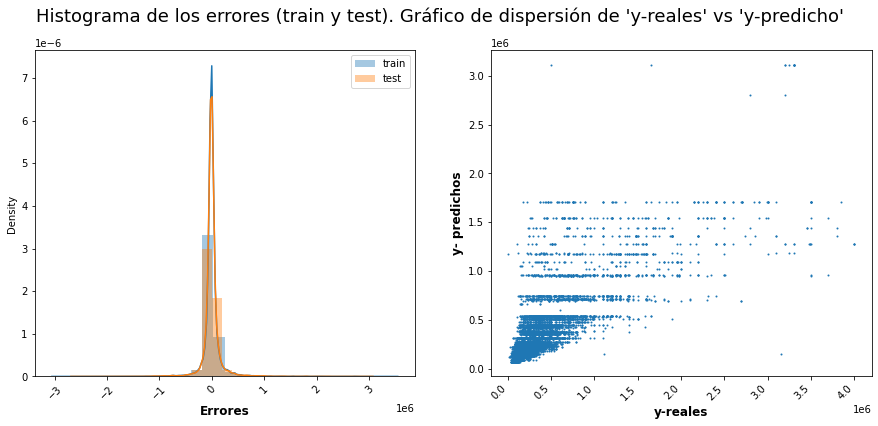

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentarios:** hasta aca corri el modelo Benchmark y evalue errores y los valores de y-predichos vs y-reales. Los errores con un arbol de profundidad 6 y utilizando esas variables indemendientes parecerian elevados. El grafico de dispersion muestra puntos muy alejados de la linea teórica (y=x). Con lo cual hay que trabajar, con este modelo como punto de partida para mejorar errores y predicciones de "y".


**ARBOL DE DECISIÓN:** Para el arbol de decision, se utilizaron las mismas variables independientes (numero de baños y superficie cubierta) que en el modelo Benchmark, pero se subio la profundidad a 8.

In [ ]:
X_ad = prop_ML1[["rooms", "surface_covered","surface_total"]]
y_ad = prop_ML1["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ad, y_ad, test_size = 0.3, random_state = 42)

In [ ]:
tree_ad = DecisionTreeRegressor(max_depth = 8)

In [ ]:
tree_ad.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_ad.predict(X_test)
y_train_pred = tree_ad.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 157130.8804963125
Raíz del error cuadrático medio en Test: 171137.6981162566


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

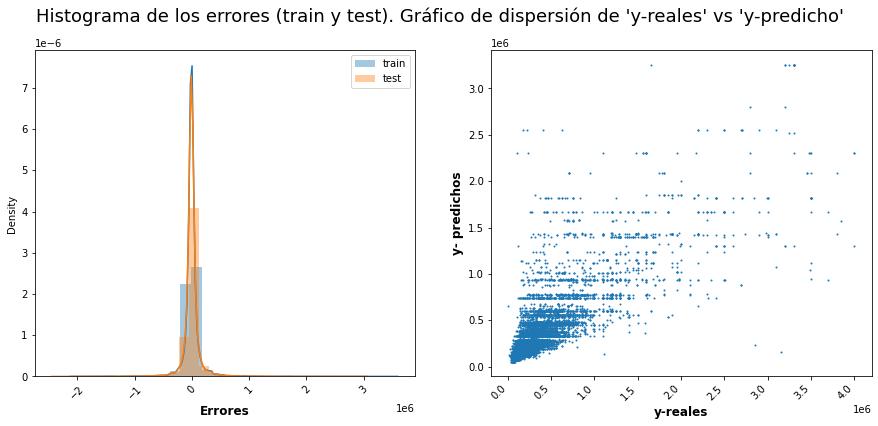

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentarios:** si bien modificando la profundidad del arbol se lograron valores de RMSE menores, resulta igualmente alto. De manera que voy a ver para profundidades de 1 a 25 cual resultaria mejor. Ademas el grafico de predichos vs reales sigue siendo muy disperso.

Text(0.5, 1.0, 'RMSE para distintas profundidades')

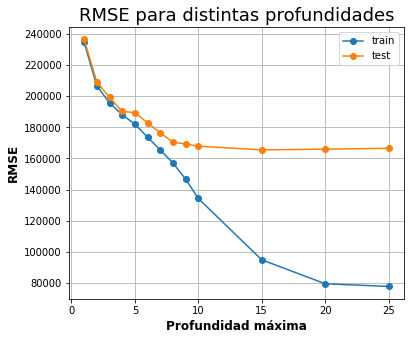

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "black")

Viendo este grafico usaria una profundidad de 10 porque valores de profundidad mayores estarian sobreajustando el modelo y, menores me darian valores de RMSE muy elevados.

In [ ]:
#Corro el arbol de decision con profundidad 10:
tree_final = DecisionTreeRegressor(max_depth = 10)

In [ ]:
tree_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_final.predict(X_test)
y_train_pred = tree_final.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 134293.44456896625
Raíz del error cuadrático medio en Test: 168014.43284482253


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

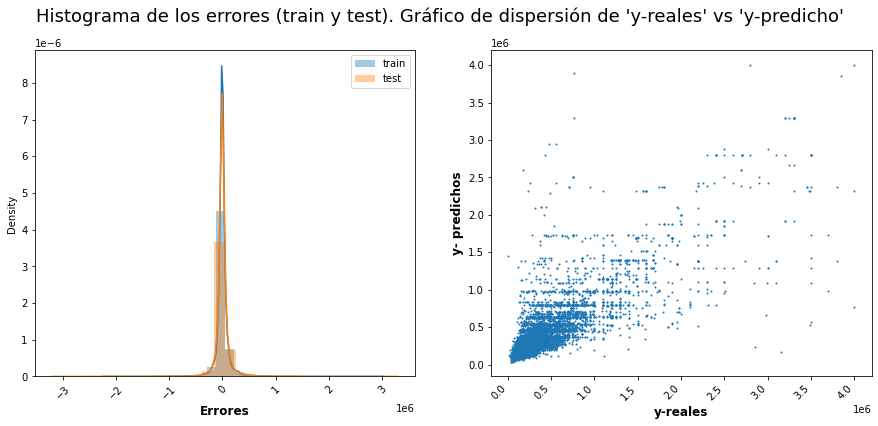

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


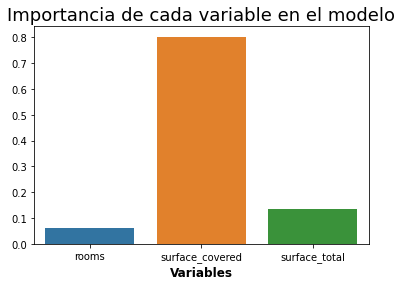

In [ ]:

importances = tree_final.feature_importances_
columns = X_ad.columns

plt.figure(figsize = (6, 4))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "black")
plt.show()

**Comentarios:** el arbol con profundidad 10 logro que bajaran los errores y que el grafico de predichos vs reales este menos disperso. Tal vez cabria trabajar incluyendo alguna otra variable que me ayude en la prediccion de precio.

**Vecino mas cercano:** ahora voy a entrenar y testear un modelo de vecino mas cercano con un numero de vecinos de 5. Usando las mismas variables independientes que vengo usando.

In [ ]:
X_vc = prop_ML1[["rooms", "surface_covered","surface_total"]]
y_vc = prop_ML1["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vc, y_vc, test_size = 0.3, random_state = 42)

In [ ]:
knn_vc = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn_vc.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_test_pred = knn_vc.predict(X_test)
y_train_pred = knn_vc.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 129132.519670248
Raíz del error cuadrático medio en Test: 161097.86729772977


Text(0.5, 1.0, 'RMSE para distintos números de vecinos')

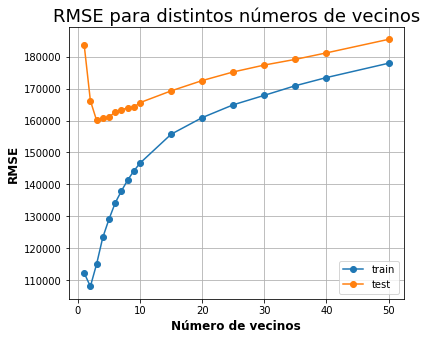

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
plt.figure(figsize = (6,5))          
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintos números de vecinos", fontsize = 18, color = "black")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

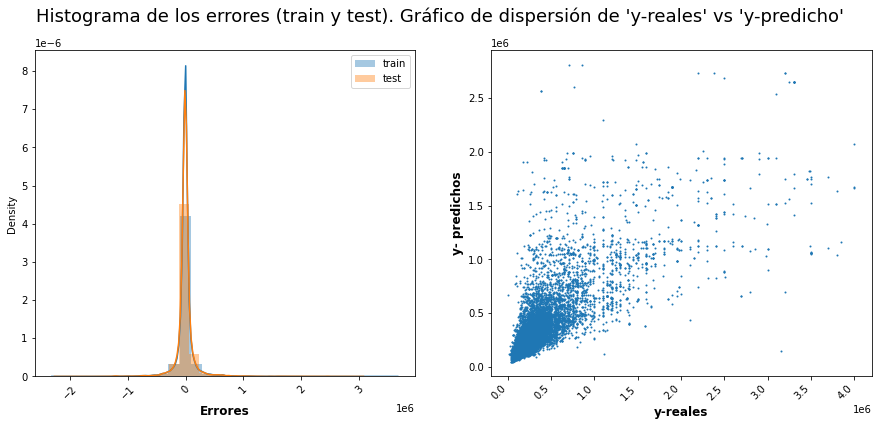

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentarios:** por un lado, con knn los errores son similares a los del arbol de decision de profundidad 10. Por otro lado, evaluando la mejor opcion de numero de vecinos, pareceria que con 5 vecinos logro el menor RMSE. El grafico de dispersion de predichos vs reales sigue mostrando que falta ajuste. Por lo cual ahora voy a tratar de agregar variables independientes al modelo.

**Incorporación de las variables latitud y longitud para ver si mejoro el ajuste de ambos modelos:**

In [ ]:
#Nuevo dataset con las variables de interes:
prop_ML2=prop_ML[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [ ]:
#Elimino datos faltantes por haber incorporado dos columnas al dataset anterior:
prop_ML2 = prop_ML2.dropna()
prop_ML2.shape

(76771, 8)

Comienzo con **arbol de decision**, usando una profundidad de 10

In [ ]:
X_ad1 = prop_ML2[["rooms", "surface_covered","surface_total","lat", "lon"]]
y_ad1 = prop_ML2["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ad1, y_ad1, test_size = 0.3, random_state = 42)

In [ ]:
tree_ad1 = DecisionTreeRegressor(max_depth = 10)

In [ ]:
tree_ad1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_ad1.predict(X_test)
y_train_pred = tree_ad1.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 80332.09726516985
Raíz del error cuadrático medio en Test: 100106.05720730548


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

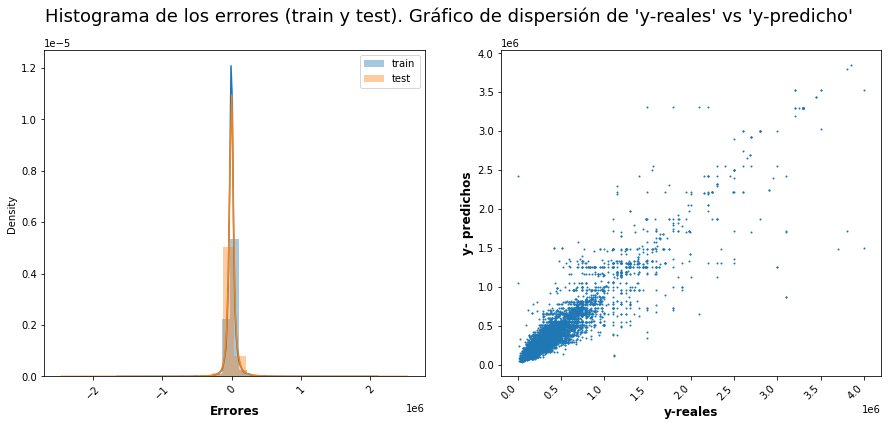

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


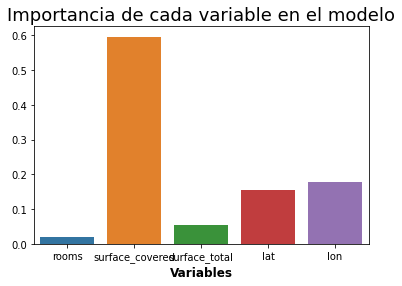

In [ ]:
importances = tree_ad1.feature_importances_
columns =X_ad1.columns

plt.figure(figsize = (6, 4))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "black")
plt.show()

Text(0.5, 1.0, 'RMSE para distintas profundidades')

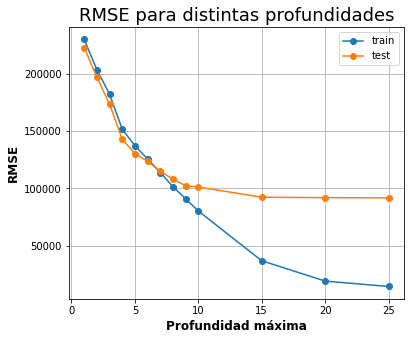

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "black")

**Comentarios:**
*   La incorporacion de latitud y longitud logro bajar notablemente los errores.
*   El grafico de reales vs predichos muestra menor dispersion.
*   Viendo la contribucion de cada variable al modelo, sacaria el numero de ambientes y dejaria: superficie cubierta, superficie total, latitud y longitud.
*   Sigo utilizando la profundidad de 10. 

In [ ]:
#Hago arbol de decision pero con las variables: superficie cubierta, latitud y longitud:
X_ad2 = prop_ML2[["surface_covered", "lat", "lon", "surface_total"]]
y_ad2 = prop_ML2["price"]

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ad2, y_ad2, test_size = 0.3, random_state = 42)

In [ ]:
tree_ad2 = DecisionTreeRegressor(max_depth = 10)

In [ ]:
tree_ad2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_ad2.predict(X_test)
y_train_pred = tree_ad2.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 80049.47995697078
Raíz del error cuadrático medio en Test: 97967.77462532744


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

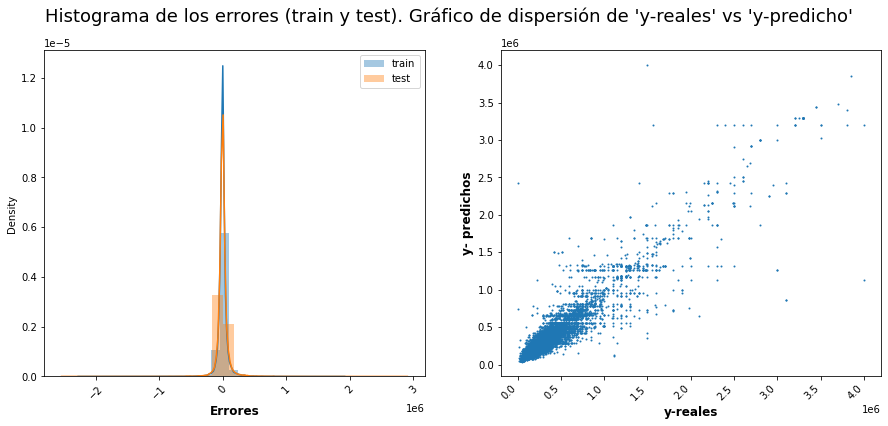

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


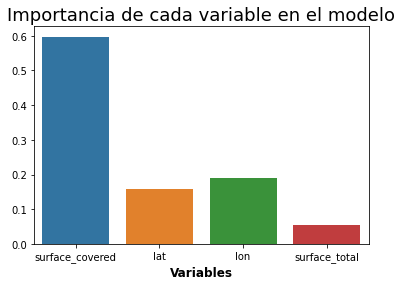

In [ ]:
importances = tree_ad2.feature_importances_
columns =X_ad2.columns

plt.figure(figsize = (6, 4))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "black")
plt.show()

**Comentarios:** Los valores de RSME bajaron un poco sacando la variable numero de ambientes, con lo cual seria un modelo mas simple modelo mas simple con cuatro variables independientes en lugar de cinco. Si miramos la grafica de predichos vs reales se ve una buena prediccion.

**Vecino mas cercano:**

In [ ]:
#Ahora hago modelo usando las mismas variables anteriores pero con vecino mas cercano, usando un numero de 5 vecinos:
X_vc1 = prop_ML2[["surface_covered", "lat", "lon", "surface_total"]]
y_vc1 = prop_ML2["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vc1, y_vc1, test_size = 0.3, random_state = 42)

In [ ]:
knn_vc1 = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn_vc1.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_test_pred = knn_vc1.predict(X_test)
y_train_pred = knn_vc1.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 114688.27608376734
Raíz del error cuadrático medio en Test: 139920.13607152563


Text(0.5, 1.0, 'RMSE para distintos números de vecinos')

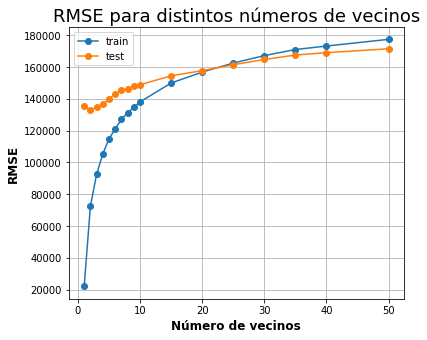

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
plt.figure(figsize = (6,5))          
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintos números de vecinos", fontsize = 18, color = "black")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

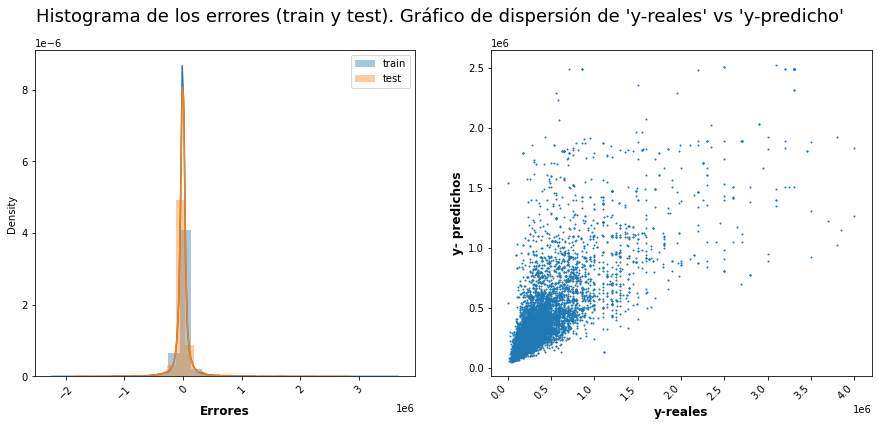

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentarios:** considero que el numero de vecinos adecuado es 5. Por debajo de ese valor hay sobreajuste y, por encima el error aumenta notablemente. De todas maneras, los errores son mayores que con el modelo de arbol de decision.

In [ ]:
resumen = {"Modelos":["Benchmark", "Árbol de decisión", "Vecinos más cercanos", "Árbol de decisión", "Árbol de decisión", "Vecinos más cercanos"], 
           "Hiper-parámetros":["profundidad máxima = 6", "profundidad máxima = 10", "número de vecinos = 5", "profundidad máxima = 10","profundidad máxima = 10" , "número de vecinos = 5"], 
           "Variables X": [3, 3, 3, 5, 4, 4], "RMSE (test)":["~183000", "~168000", "~161000", "~100000", "~98000","~140000" ]}
pd.DataFrame(resumen)

,Modelos,Hiper-parámetros,Variables X,RMSE (test)
0,Benchmark,profundidad máxima = 6,3,~183000
1,Árbol de decisión,profundidad máxima = 10,3,~168000
2,Vecinos más cercanos,número de vecinos = 5,3,~161000
3,Árbol de decisión,profundidad máxima = 10,5,~100000
4,Árbol de decisión,profundidad máxima = 10,4,~98000
5,Vecinos más cercanos,número de vecinos = 5,4,~140000


**CONCLUSIONES:**
Haciendo un resumen de los modelos probados me quedo con el numero 4. Este es un arbol de decisión de profundidad 10 con 4 variables independientes: latitud y longitud (me hablarian de la ubicacion de la propiedad), superficie cubierta y superficie total. Las razones por las cuales considero mejor este modelo son:

*   Me da un error mas bajo que el resto de los modelos.
*   Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Lo cual indica una buena aproximación a los datos.
*   Los errores RMSE, son similares tanto para test como para train, indicando que no hay un gran sobreajuste.
*   El grafico de predichos vs teoricos muestra una buena prediccion del precio ya que los puntos estan cerca de la diagonal (la relación y=x ), lo cual estaria indicando que es un buen regresor. 



